In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('events.csv')

In [3]:
df2=df1[:14000]

In [4]:
df2

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
13995,1433183735635,404403,view,416187,NaN
13996,1433182141953,1173657,view,64803,NaN
13997,1433183736054,679126,view,350788,NaN
13998,1433180671215,1203624,view,254451,NaN


In [5]:
import numpy as np

In [6]:
print(np.where(df2['transactionid']>0))

(array([  130,   304,   418,   814,   843,  1214,  1215,  1234,  1350,
        1512,  1690,  1711,  1871,  2075,  2142,  2237,  2242,  2292,
        2315,  2316,  2578,  2608,  2789,  2946,  2981,  3341,  3346,
        3489,  3521,  3568,  3613,  3674,  3794,  3842,  3927,  4117,
        4380,  4393,  4563,  4660,  4812,  5095,  5222,  5271,  5292,
        5293,  5307,  5586,  5694,  5756,  5769,  5803,  5825,  6186,
        6192,  6325,  6383,  6388,  6396,  6683,  6690,  7198,  7238,
        7240,  7292,  7432,  7689,  7723,  7809,  7859,  7904,  7960,
        8275,  8414,  8637,  8825,  8964,  8987,  9073,  9165,  9208,
        9258,  9270,  9272,  9403,  9463,  9494,  9495,  9826, 10211,
       10400, 10470, 10531, 10737, 10925, 11184, 11314, 11360, 11387,
       11405, 11434, 11455, 11513, 11662, 11680, 11685, 11711, 11787,
       11812, 11849, 11946, 12148, 12226, 12269, 12332, 12487, 12512,
       12747, 13004, 13081, 13331, 13963]),)


In [7]:
df2

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
13995,1433183735635,404403,view,416187,NaN
13996,1433182141953,1173657,view,64803,NaN
13997,1433183736054,679126,view,350788,NaN
13998,1433180671215,1203624,view,254451,NaN


In [8]:
df2.to_csv('data2.csv',index=False)

In [9]:
df3=pd.read_csv('coustumer_data_for_ml_2.csv')

In [10]:
df3['label'] = df3['no_transaction'].apply(lambda x: 1 if x >0 else 0)

In [11]:
x=np.array([df3['no_views'],df3['time_spent_minutes'],df3['no_addtocart']]).T

In [12]:
y=np.array(df3['label'])

In [13]:
df3

,visitorid,no_views,no_addtocart,no_transaction,time_spent_minutes,label
0,17,1,0,0,0.0000,0
1,52,1,0,0,0.0000,0
2,137,1,0,0,0.0000,0
3,202,1,0,0,0.0000,0
4,337,1,0,0,0.0000,0
...,...,...,...,...,...,...
995,155379,1,0,0,0.0000,0
996,155417,3,0,0,0.3908,0
997,155590,5,0,0,8.5418,0
998,155844,1,0,0,0.0000,0


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)


GradientBoostingRegressor()

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(x_test)

# Clip predictions to stay between 0 and 100 (optional but useful)
y_pred = np.clip(y_pred, 0, 100)

# Evaluate using regression metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.004994994707481307
Mean Squared Error (MSE): 0.004845441166983387
R^2 Score: 0.026041976485751572


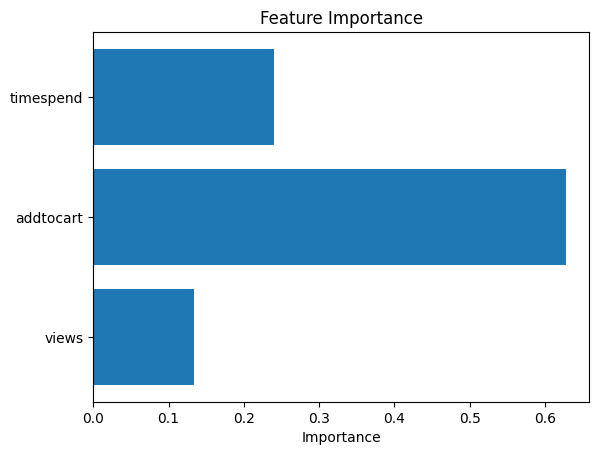

In [17]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features =['views','addtocart','timespend']

plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [18]:
a=[[2,50,20],]

In [19]:
model.predict(a)

array([0.01248808])

In [20]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [21]:
import joblib

In [22]:
joblib.dump(model, 'model.pkl')


['model.pkl']

In [36]:
import gradio as gr
import joblib
import numpy as np

# Load trained model
model = joblib.load("model.pkl")

# Define prediction function
def predict_customer_intention(input_features):
    try:
        # Convert comma-separated input to float list
        features = list(map(float, input_features.split(",")))
        pred = model.predict([features])[0]
        pred = np.clip(pred, 0, 100)  # Ensure result stays within 0-100
        pred1=pred*100
        return f"Predicted Customer Intention: {pred1:.2f}%"
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface
iface = gr.Interface(
    fn=predict_customer_intention,
    inputs=gr.Textbox(placeholder="Enter features 'number of views','number of addtocart','timespend' values separated by commas eg. 30,4,23" ),
    outputs="text",
    title="Customer Intention Predictor",
    description="Enter feature values as comma-separated numbers. The model returns a prediction between 0% and 100%."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.
